In [3]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [4]:
#Load the Dataset

df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
#Exploratory Data Analysis (EDA)

#Basic Info and Data Types

df.info()
df.shape
df.dtypes
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [6]:
#Check for Missing Values

df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
#Statistical Summary of Numerical Features
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


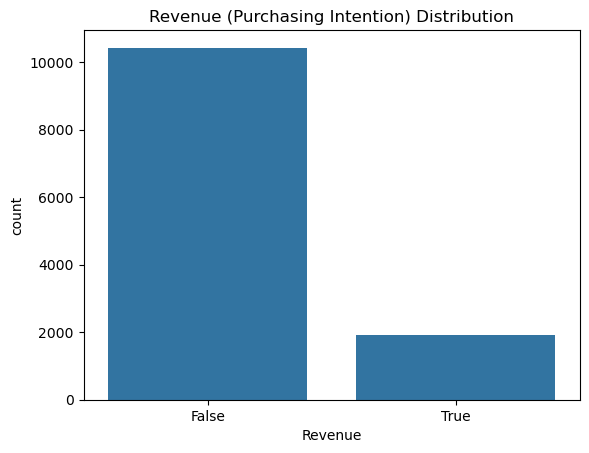

Revenue
False    0.845255
True     0.154745
Name: proportion, dtype: float64

In [8]:
#Target Variable Distribution

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Revenue', data=df)
plt.title('Revenue (Purchasing Intention) Distribution')
plt.show()

df['Revenue'].value_counts(normalize=True)


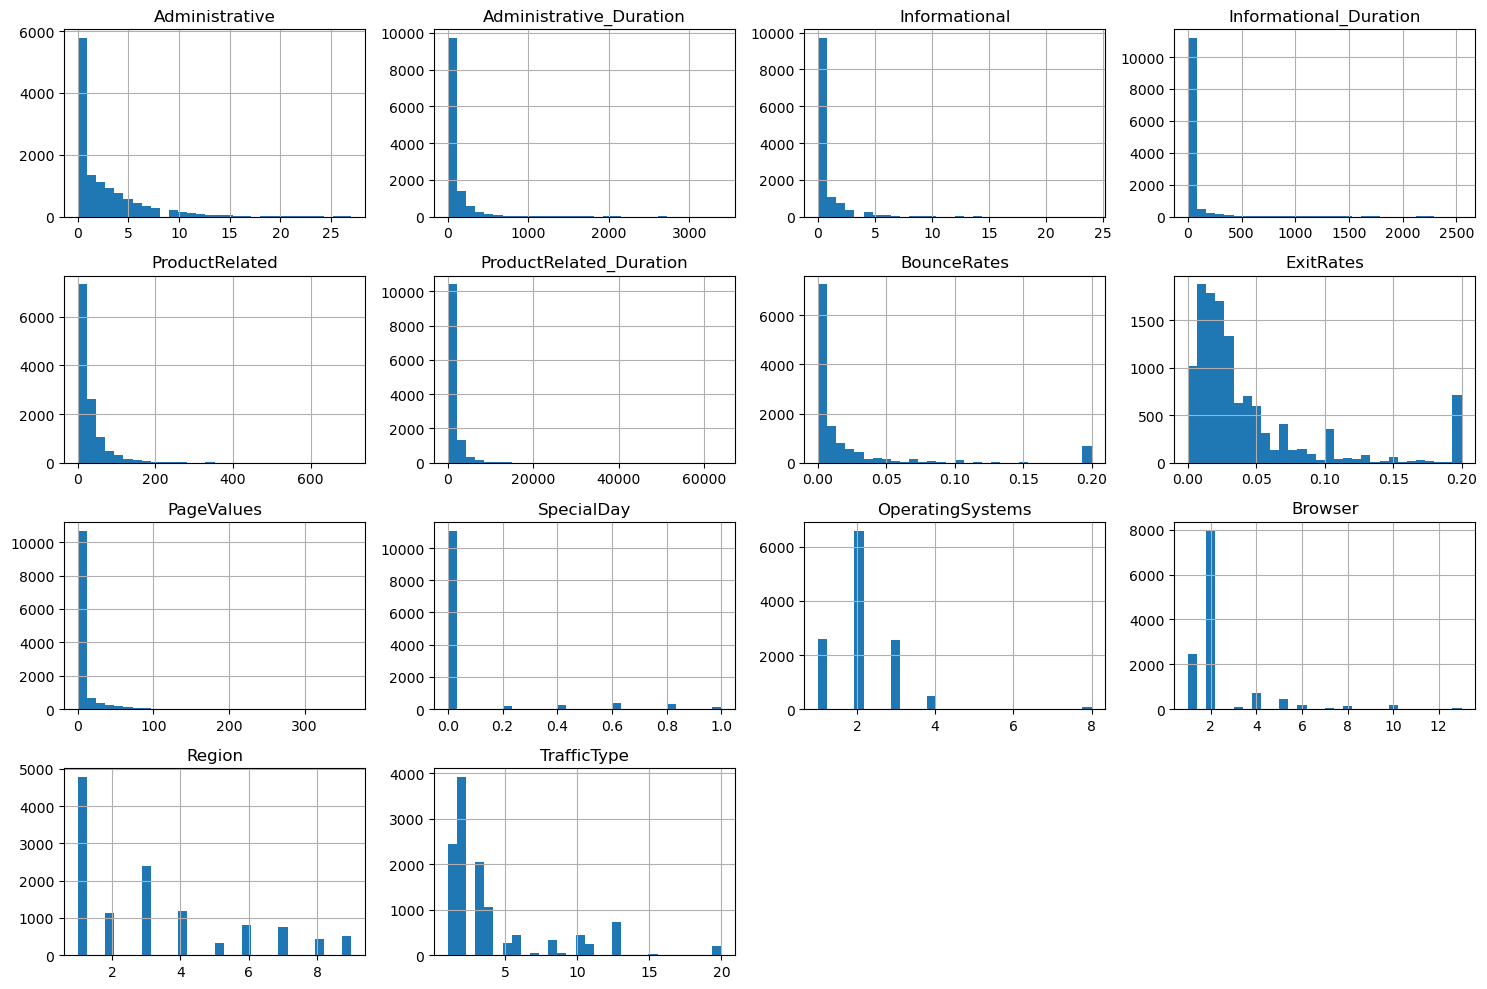

In [9]:
#Univariate Analysis- Numerical Features

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

df[numerical_features].hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()


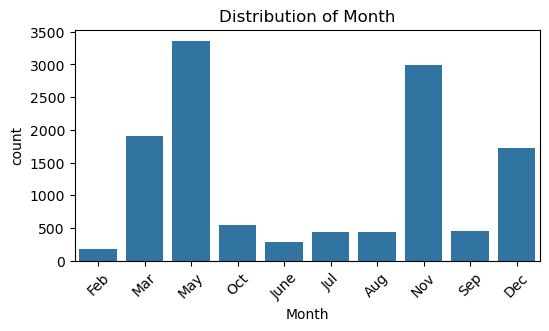

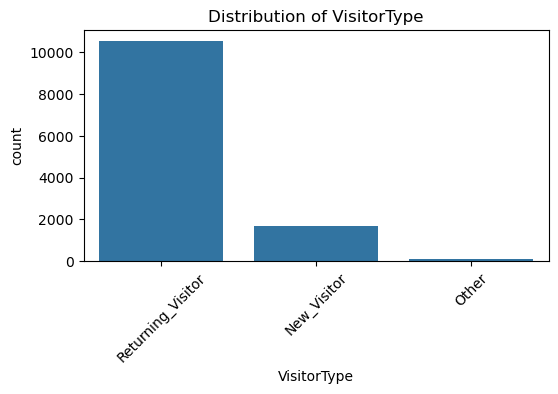

In [10]:
#Univariate Analysis- Categorical Features

categorical_features = df.select_dtypes(include='object').columns

for col in categorical_features:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

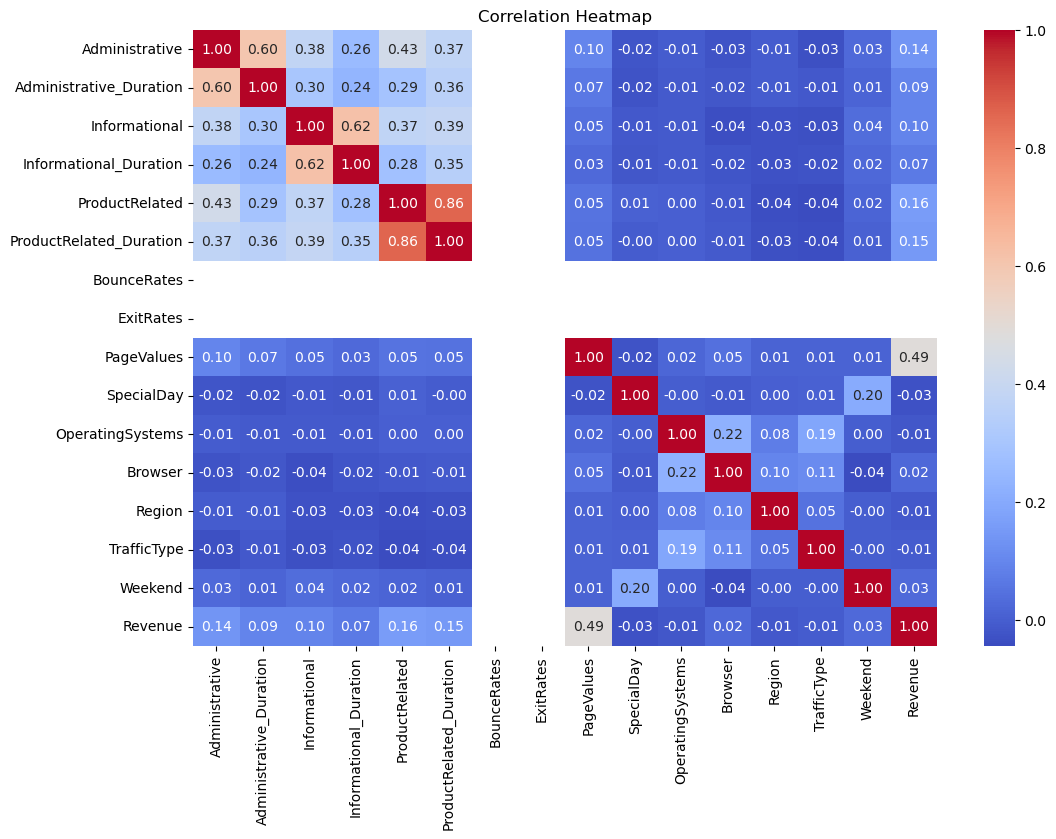

In [11]:
#Correlation Heatmap

#Check Non-Numeric Columns:
df.select_dtypes(include='object').columns

# Keep only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64', 'bool'])

# Convert bool columns to int for correlation to work properly
numeric_df = numeric_df.astype(int)

# Plot correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

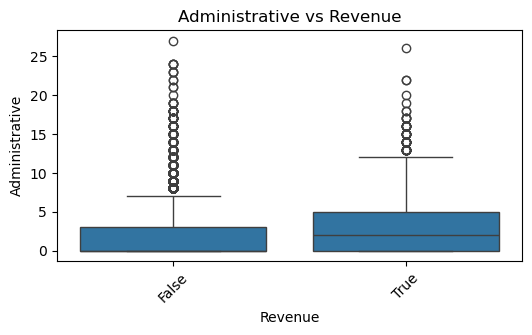

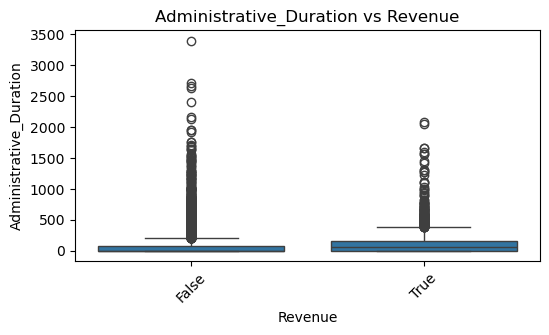

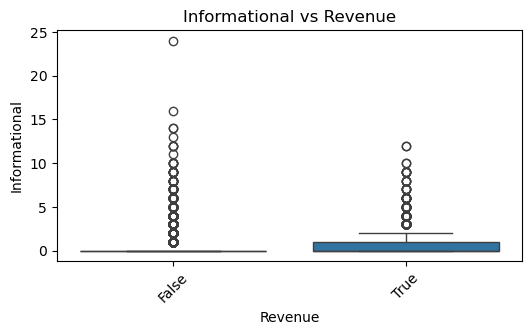

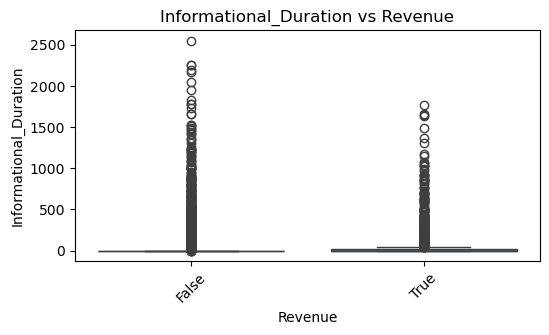

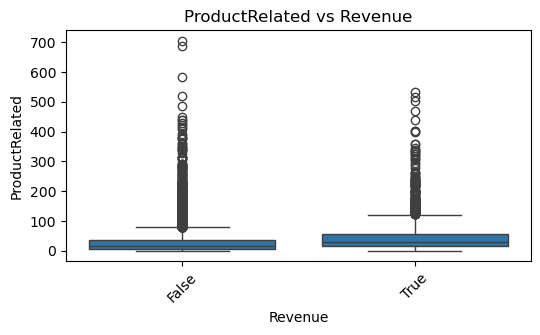

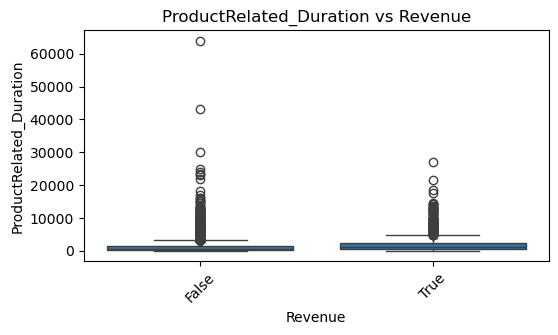

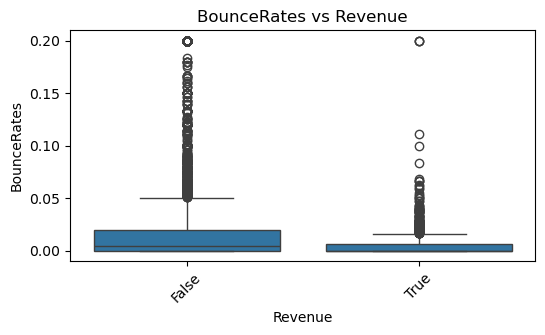

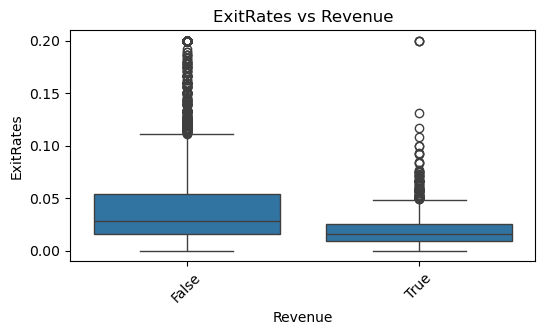

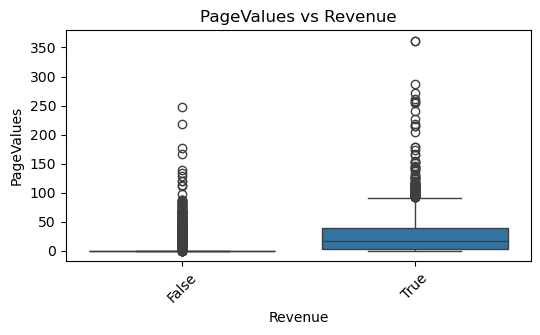

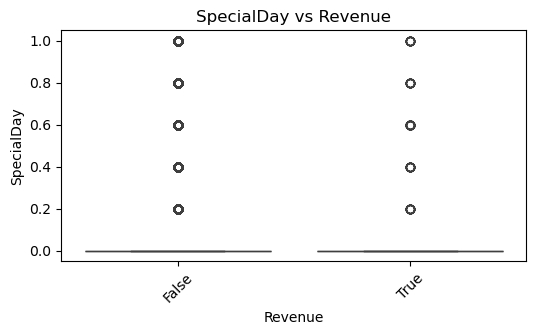

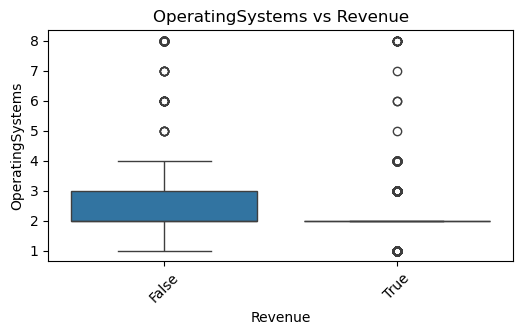

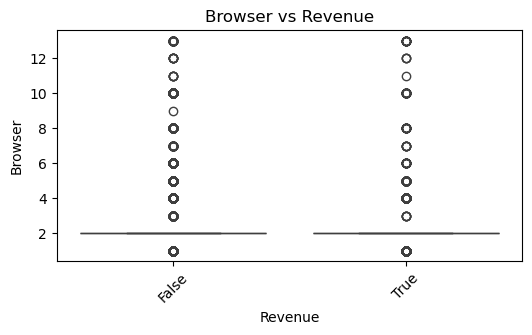

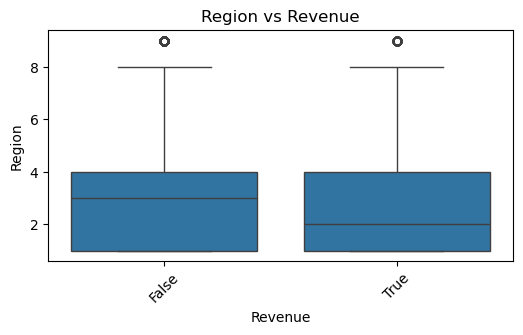

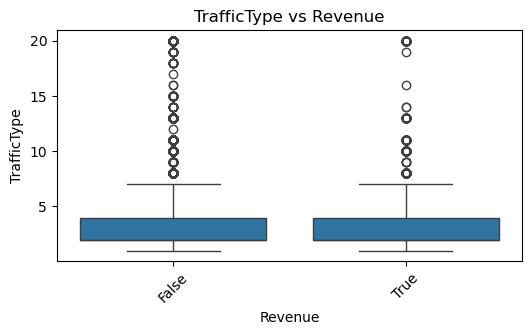

In [12]:
#Bivariate Analysis with Target Variable - Numerical vs Revenue

for col in numerical_features:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x='Revenue', y=col, data=df)
    plt.title(f'{col} vs Revenue')
    plt.xticks(rotation=45)
    plt.show()


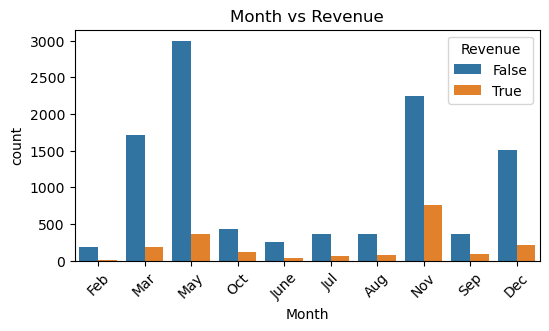

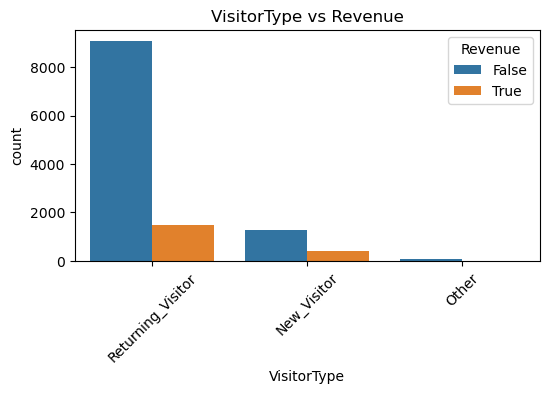

In [13]:
#Bivariate Analysis with Target Variable - Categorical vs Revenue

for col in categorical_features:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=col, hue='Revenue', data=df)
    plt.title(f'{col} vs Revenue')
    plt.xticks(rotation=45)
    plt.show()

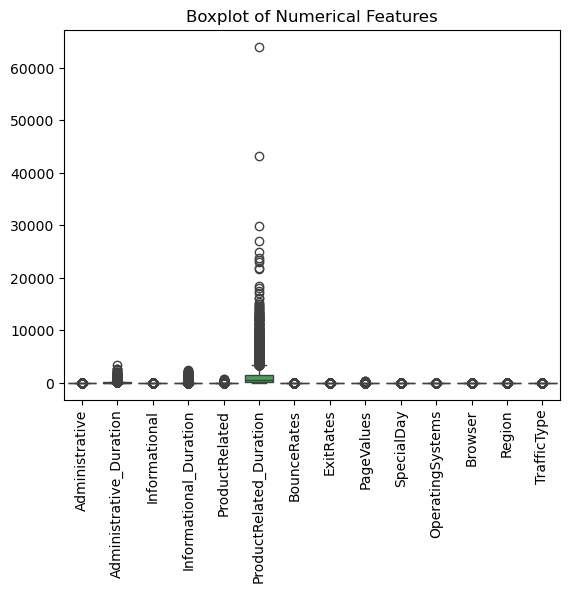

In [14]:
#Check for Outliers

sns.boxplot(data=df[numerical_features])
plt.xticks(rotation=90)
plt.title("Boxplot of Numerical Features")
plt.show()

In [15]:
#Data Preprocessing

# Encode categorical columns
cat_cols = df.select_dtypes(include=['object', 'bool']).columns
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Scale numeric features
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('Revenue')
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [16]:
#Split Data

X = df.drop('Revenue', axis=1)
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2084
           1       0.76      0.36      0.49       382

    accuracy                           0.88      2466
   macro avg       0.83      0.67      0.71      2466
weighted avg       0.87      0.88      0.86      2466



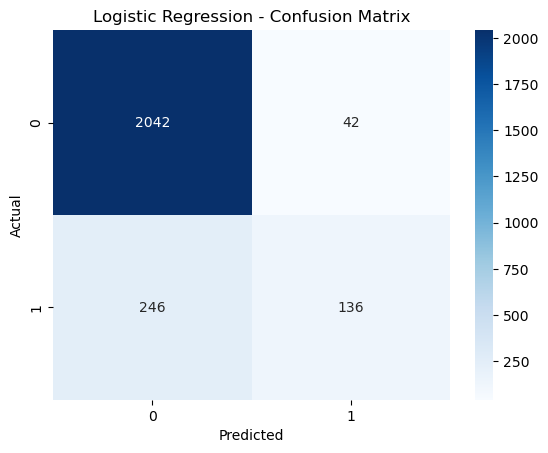


K-Nearest Neighbors Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      2084
           1       0.64      0.37      0.47       382

    accuracy                           0.87      2466
   macro avg       0.77      0.67      0.70      2466
weighted avg       0.85      0.87      0.85      2466



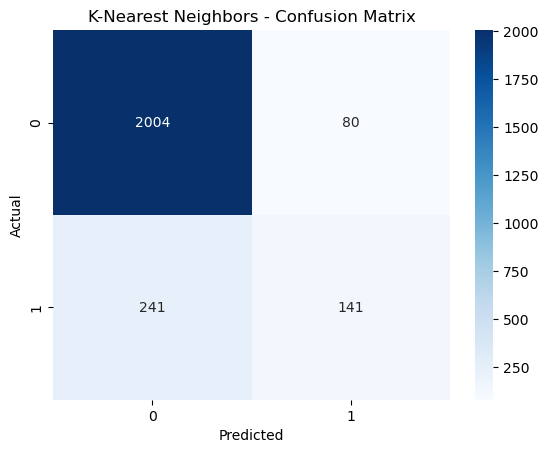


Support Vector Machine Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2084
           1       0.73      0.42      0.53       382

    accuracy                           0.89      2466
   macro avg       0.81      0.70      0.73      2466
weighted avg       0.87      0.89      0.87      2466



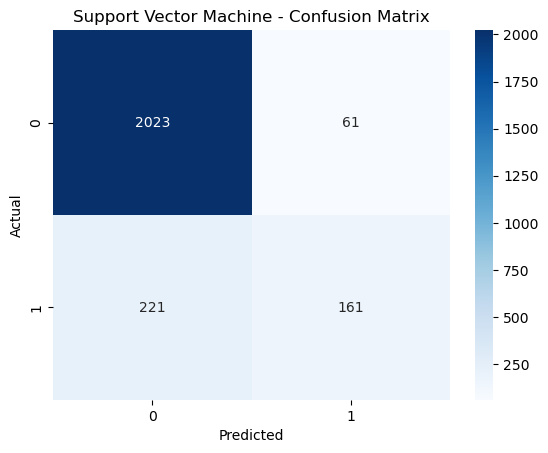


Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2084
           1       0.54      0.56      0.55       382

    accuracy                           0.86      2466
   macro avg       0.73      0.74      0.73      2466
weighted avg       0.86      0.86      0.86      2466



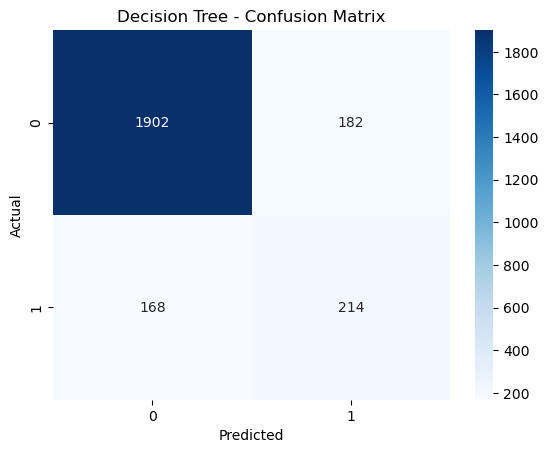


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2084
           1       0.71      0.57      0.63       382

    accuracy                           0.90      2466
   macro avg       0.82      0.76      0.79      2466
weighted avg       0.89      0.90      0.89      2466



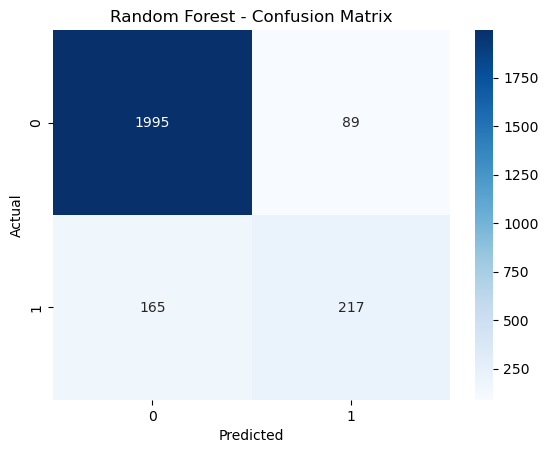

In [17]:
#Train Multiple Classification Models and Evaluate

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })

    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

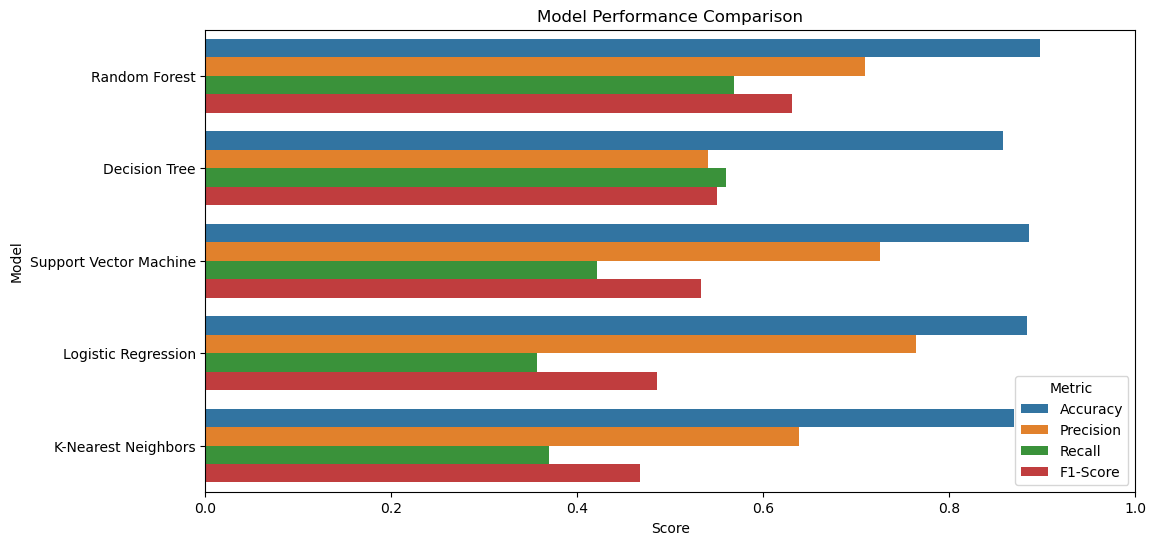

,Model,Accuracy,Precision,Recall,F1-Score
4,Random Forest,0.896999,0.709150,0.568063,0.630814
3,Decision Tree,0.858070,0.540404,0.560209,0.550129
2,Support Vector Machine,0.885645,0.725225,0.421466,0.533113
0,Logistic Regression,0.883212,0.764045,0.356021,0.485714
1,K-Nearest Neighbors,0.869830,0.638009,0.369110,0.467662


In [18]:
#Visualize Model Comparison

results_df = pd.DataFrame(results).sort_values(by='F1-Score', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=results_df.melt(id_vars='Model'), x='value', y='Model', hue='variable')
plt.title('Model Performance Comparison')
plt.xlabel('Score')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.legend(title='Metric')
plt.show()

results_df